In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pip install pydicom

     |████████████████████████████████| 35.5MB 90kB/s 


In [4]:
import os
from os.path import join as opjoin
import numpy as np
from matplotlib import pyplot as plt
base_path = '/content/drive/My Drive/DeepSEED-3D-ConvNets-for-Pulmonary-Nodule-Detection'
data_path = '/content/drive/My Drive/dsb2018_topcoders/data'
luna_path = opjoin(base_path, 'luna_detector')
os.chdir(luna_path)
from path import *

In [2]:
os.chdir(base_path)
!git pull

remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 6 (delta 5), reused 6 (delta 5), pack-reused 0
Unpacking objects: 100% (6/6), done.
From https://github.com/tilacyn/DeepSEED-3D-ConvNets-for-Pulmonary-Nodule-Detection
   93a3c37..fc27e7d  master     -> origin/master
Updating 93a3c37..fc27e7d
Fast-forward
 luna_detector/cross_validation.py | 12 +++++++-----
 luna_detector/metrics.py          |  2 +-
 luna_detector/roc_eval.py         |  5 ++++-
 3 files changed, 12 insertions(+), 7 deletions(-)


## Test Class Definition

In [5]:
os.chdir(luna_path)
from roc_eval import PatientTest, SimpleTest, run_test
from metrics import MetricsCalculator, Metrics, FROCMetricsCalculator, draw_several, save_csv, add_averages_to_csv
from cross_validation import CrossValidation, label2model
import numpy as np

In [7]:
cv = CrossValidation('cross_validation_1')
cv.init_stage(0, 101, 80)
cv.init_stage(1, 50, 50)
cv.init_triple_stage(2, 50, 50, label2model(False, '2_bad', 86)['path2model'])
cv.init_stage(3, 56, 92)
cv.init_stage(4, 50, 47)

In [15]:
cv_tta = CrossValidation('cross_validation_1_all_tta', True)
cv_tta.init_stage(0, 101, 80)
cv_tta.init_stage(1, 50, 50)
cv_tta.init_triple_stage(2, 50, 50, label2model(False, '2_bad', 86)['path2model'])
cv_tta.init_stage(3, 56, 92)
cv_tta.init_stage(4, 50, 47)

In [16]:
import pandas as pd
import numpy as np

def add_averages_to_csv(filename, output):
    df = pd.read_csv(filename)
    metrics = df.to_numpy()

    def create_row(name, type):
        f = None
        if type == 'average':
            f = np.mean
        elif type == 'std':
            f = np.std
        rows = np.array([row for row in metrics if row[0].startswith(name)])
        # print(rows)
        return ['{}_{}'.format(name, type)] + [np.round(f(values), 3) for values in [rows[:, i + 1] for i in range(7)]]


    average_aug = create_row('augmented', 'average')
    average_baseline = create_row('baseline', 'average')
    std_aug = create_row('augmented', 'std')
    std_baseline = create_row('baseline', 'std')
    df.loc[len(metrics)] = average_aug
    df.loc[len(metrics) + 1] = average_baseline
    df.loc[len(metrics) + 2] = std_aug
    df.loc[len(metrics) + 3] = std_baseline
    df.to_csv(output)


In [17]:
cv.load_stages()
cv_tta.load_stages()
cv.rename_labels()
cv_tta.rename_labels()

cv.save_csv('cv_fixed.csv')
add_averages_to_csv('cv_fixed.csv', 'cv_fixed_avg.csv')
cv_tta.save_csv('cv_tta.csv')
add_averages_to_csv('cv_tta.csv', 'cv_tta_avg.csv')

In [6]:
cv = CrossValidation('cross_validation_1_all_tta', True)
# cv.init_stage(0, 101, 80)
cv.init_stage(1, 50, 50)
cv.run_stage(1, 0.8)
cv.eval_stage_metrics(1)
cv.save_stage(1)

cv.init_stage(4, 50, 47)
cv.run_stage(4, 0.8)
cv.eval_stage_metrics(4)
cv.save_stage(4)

cv = CrossValidation('cross_validation_1_all_tta')

cv.init_stage(3, 56, 92)
cv.run_stage(3, 0.8)
cv.eval_stage_metrics(3)
cv.save_stage(3)

cv.init_triple_stage(2, 50, 50, label2model(False, '2_bad', 86)['path2model'])
cv.run_stage(2, 0.8)
cv.eval_stage_metrics(2)
cv.save_stage(2)

cv = CrossValidation('cross_validation_1_all_tta')
cv.init_stage(0, 101, 80)
cv.run_stage(0, 0.8)
cv.eval_stage_metrics(0)
cv.save_stage(0)

creating model
FOCAL LOSS 2 0.5
FOCAL LOSS 2 0.5
ALL TTA
len idcs  82
len(labels)  82
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32,

9it [00:00, 88.47it/s]

evaluating froc results...


750it [00:08, 86.72it/s]
10it [00:00, 94.43it/s]

evaluating froc results...


750it [00:08, 90.73it/s]
10it [00:00, 91.11it/s]

evaluating froc results...


750it [00:08, 92.12it/s]
10it [00:00, 95.72it/s]

evaluating froc results...


750it [00:08, 92.25it/s]
10it [00:00, 96.81it/s]

evaluating froc results...


750it [00:07, 94.75it/s]
10it [00:00, 98.87it/s]

evaluating froc results...


750it [00:07, 94.94it/s]
10it [00:00, 96.44it/s]

evaluating froc results...


750it [00:07, 95.06it/s]
10it [00:00, 95.30it/s]

evaluating froc results...


750it [00:07, 94.84it/s]
10it [00:00, 96.82it/s]

evaluating froc results...


750it [00:07, 95.05it/s]
10it [00:00, 97.40it/s]

evaluating froc results...


750it [00:07, 96.09it/s]
9it [00:00, 85.89it/s]

evaluating froc results...


750it [00:08, 88.64it/s]
9it [00:00, 87.79it/s]

evaluating froc results...


750it [00:08, 90.58it/s]
10it [00:00, 96.84it/s]

evaluating froc results...


750it [00:08, 92.14it/s]
10it [00:00, 94.04it/s]

evaluating froc results...


750it [00:08, 93.02it/s]
10it [00:00, 96.41it/s]

evaluating froc results...


750it [00:08, 93.48it/s]
10it [00:00, 96.20it/s]

evaluating froc results...


750it [00:07, 93.93it/s]
10it [00:00, 96.32it/s]

evaluating froc results...


750it [00:07, 94.96it/s]
10it [00:00, 94.72it/s]

evaluating froc results...


750it [00:07, 95.04it/s]
10it [00:00, 96.16it/s]

evaluating froc results...


750it [00:07, 95.19it/s]
10it [00:00, 95.45it/s]

evaluating froc results...


750it [00:07, 95.58it/s]


creating model
FOCAL LOSS 2 0.5
FOCAL LOSS 2 0.5
ALL TTA
len idcs  86
len(labels)  86
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32,

9it [00:00, 80.25it/s]

evaluating froc results...


880it [00:10, 85.74it/s]
9it [00:00, 84.17it/s]

evaluating froc results...


880it [00:09, 89.09it/s]
9it [00:00, 88.41it/s]

evaluating froc results...


880it [00:09, 91.66it/s]
10it [00:00, 90.25it/s]

evaluating froc results...


880it [00:09, 92.39it/s]
10it [00:00, 94.14it/s]

evaluating froc results...


880it [00:09, 93.10it/s]
9it [00:00, 88.83it/s]

evaluating froc results...


880it [00:09, 93.04it/s]
10it [00:00, 94.55it/s]

evaluating froc results...


880it [00:09, 94.08it/s]
10it [00:00, 92.63it/s]

evaluating froc results...


880it [00:09, 94.99it/s]
10it [00:00, 96.32it/s]

evaluating froc results...


880it [00:09, 94.95it/s]
10it [00:00, 97.36it/s]

evaluating froc results...


880it [00:09, 94.84it/s]
9it [00:00, 84.84it/s]

evaluating froc results...


880it [00:10, 87.58it/s]
9it [00:00, 89.13it/s]

evaluating froc results...


880it [00:09, 89.85it/s]
10it [00:00, 90.37it/s]

evaluating froc results...


880it [00:09, 91.87it/s]
10it [00:00, 91.56it/s]

evaluating froc results...


880it [00:09, 92.82it/s]
10it [00:00, 95.46it/s]

evaluating froc results...


880it [00:09, 93.54it/s]
10it [00:00, 93.95it/s]

evaluating froc results...


880it [00:09, 93.83it/s]
10it [00:00, 97.10it/s]

evaluating froc results...


880it [00:09, 95.20it/s]
10it [00:00, 96.09it/s]

evaluating froc results...


880it [00:09, 94.27it/s]
10it [00:00, 94.04it/s]

evaluating froc results...


880it [00:09, 93.45it/s]
10it [00:00, 92.94it/s]

evaluating froc results...


880it [00:09, 93.58it/s]


creating model
FOCAL LOSS 2 0.5
FOCAL LOSS 2 0.5
len idcs  86
len(labels)  86
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
da

8it [00:00, 73.99it/s]

evaluating froc results...


880it [00:10, 85.17it/s]
9it [00:00, 83.82it/s]

evaluating froc results...


880it [00:09, 88.62it/s]
9it [00:00, 88.46it/s]

evaluating froc results...


880it [00:09, 89.45it/s]
9it [00:00, 89.05it/s]

evaluating froc results...


880it [00:09, 90.10it/s]
10it [00:00, 91.54it/s]

evaluating froc results...


880it [00:09, 91.28it/s]
10it [00:00, 90.88it/s]

evaluating froc results...


880it [00:09, 91.80it/s]
10it [00:00, 92.67it/s]

evaluating froc results...


880it [00:09, 91.85it/s]
10it [00:00, 91.03it/s]

evaluating froc results...


880it [00:09, 92.49it/s]
9it [00:00, 85.68it/s]

evaluating froc results...


880it [00:09, 92.42it/s]
10it [00:00, 92.53it/s]

evaluating froc results...


880it [00:09, 92.63it/s]
8it [00:00, 78.16it/s]

evaluating froc results...


880it [00:10, 85.19it/s]
9it [00:00, 80.82it/s]

evaluating froc results...


880it [00:09, 88.25it/s]
9it [00:00, 83.89it/s]

evaluating froc results...


880it [00:09, 89.97it/s]
9it [00:00, 87.83it/s]

evaluating froc results...


880it [00:09, 90.33it/s]
10it [00:00, 93.85it/s]

evaluating froc results...


880it [00:09, 90.98it/s]
10it [00:00, 89.14it/s]

evaluating froc results...


880it [00:09, 91.72it/s]
10it [00:00, 94.41it/s]

evaluating froc results...


880it [00:09, 91.94it/s]
10it [00:00, 94.40it/s]

evaluating froc results...


880it [00:09, 92.49it/s]
9it [00:00, 89.09it/s]

evaluating froc results...


880it [00:09, 92.35it/s]
10it [00:00, 93.81it/s]

evaluating froc results...


880it [00:09, 92.79it/s]


creating model
FOCAL LOSS 2 0.5
FOCAL LOSS 2 0.5
FOCAL LOSS 2 0.5
len idcs  85
len(labels)  85
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3

9it [00:00, 79.86it/s]

evaluating froc results...


875it [00:10, 86.60it/s]
8it [00:00, 78.06it/s]

evaluating froc results...


875it [00:09, 88.77it/s]
9it [00:00, 89.61it/s]

evaluating froc results...


875it [00:09, 89.95it/s]
10it [00:00, 90.69it/s]

evaluating froc results...


875it [00:09, 91.72it/s]
10it [00:00, 93.71it/s]

evaluating froc results...


875it [00:09, 93.40it/s]
10it [00:00, 91.95it/s]

evaluating froc results...


875it [00:09, 93.89it/s]
10it [00:00, 95.06it/s]

evaluating froc results...


875it [00:09, 93.96it/s]
10it [00:00, 89.39it/s]

evaluating froc results...


875it [00:09, 93.95it/s]
10it [00:00, 92.59it/s]

evaluating froc results...


875it [00:09, 94.47it/s]
9it [00:00, 87.54it/s]

evaluating froc results...


875it [00:09, 94.86it/s]
9it [00:00, 81.37it/s]

evaluating froc results...


875it [00:09, 88.63it/s]
9it [00:00, 87.78it/s]

evaluating froc results...


875it [00:09, 90.21it/s]
9it [00:00, 89.04it/s]

evaluating froc results...


875it [00:09, 92.50it/s]
10it [00:00, 89.81it/s]

evaluating froc results...


875it [00:09, 93.31it/s]
10it [00:00, 93.52it/s]

evaluating froc results...


875it [00:09, 93.08it/s]
10it [00:00, 89.11it/s]

evaluating froc results...


875it [00:09, 93.26it/s]
10it [00:00, 93.41it/s]

evaluating froc results...


875it [00:09, 94.05it/s]
10it [00:00, 95.21it/s]

evaluating froc results...


875it [00:09, 95.12it/s]
10it [00:00, 96.79it/s]

evaluating froc results...


875it [00:09, 93.94it/s]
10it [00:00, 92.60it/s]

evaluating froc results...


875it [00:09, 94.08it/s]
9it [00:00, 82.59it/s]

evaluating froc results...


875it [00:09, 87.67it/s]
10it [00:00, 90.15it/s]

evaluating froc results...


875it [00:09, 90.63it/s]
10it [00:00, 90.86it/s]

evaluating froc results...


875it [00:09, 91.74it/s]
9it [00:00, 86.62it/s]

evaluating froc results...


875it [00:09, 92.80it/s]
10it [00:00, 91.56it/s]

evaluating froc results...


875it [00:09, 93.47it/s]
10it [00:00, 92.43it/s]

evaluating froc results...


875it [00:09, 93.94it/s]
10it [00:00, 97.37it/s]

evaluating froc results...


875it [00:09, 93.57it/s]
10it [00:00, 94.59it/s]

evaluating froc results...


875it [00:09, 93.11it/s]
10it [00:00, 94.85it/s]

evaluating froc results...


875it [00:09, 94.39it/s]
10it [00:00, 92.63it/s]

evaluating froc results...


875it [00:09, 94.85it/s]


creating model
FOCAL LOSS 2 0.5
FOCAL LOSS 2 0.5
len idcs  84
len(labels)  84
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
da

8it [00:00, 79.48it/s]

evaluating froc results...


895it [00:11, 80.96it/s]
9it [00:00, 87.37it/s]

evaluating froc results...


895it [00:10, 83.34it/s]
8it [00:00, 79.83it/s]

evaluating froc results...


895it [00:10, 85.22it/s]
9it [00:00, 87.99it/s]

evaluating froc results...


895it [00:10, 86.19it/s]
9it [00:00, 87.05it/s]

evaluating froc results...


895it [00:10, 87.00it/s]
9it [00:00, 83.12it/s]

evaluating froc results...


895it [00:10, 85.96it/s]
9it [00:00, 89.02it/s]

evaluating froc results...


895it [00:10, 86.34it/s]
9it [00:00, 87.09it/s]

evaluating froc results...


895it [00:10, 86.51it/s]
9it [00:00, 89.13it/s]

evaluating froc results...


895it [00:10, 87.80it/s]
9it [00:00, 88.06it/s]

evaluating froc results...


895it [00:10, 88.19it/s]
9it [00:00, 84.10it/s]

evaluating froc results...


895it [00:11, 80.91it/s]
9it [00:00, 85.26it/s]

evaluating froc results...


895it [00:10, 84.13it/s]
9it [00:00, 87.71it/s]

evaluating froc results...


895it [00:10, 85.26it/s]
9it [00:00, 88.27it/s]

evaluating froc results...


895it [00:10, 84.40it/s]
9it [00:00, 89.00it/s]

evaluating froc results...


895it [00:10, 87.75it/s]
9it [00:00, 87.19it/s]

evaluating froc results...


895it [00:10, 87.48it/s]
9it [00:00, 84.76it/s]

evaluating froc results...


895it [00:10, 88.02it/s]
9it [00:00, 82.14it/s]

evaluating froc results...


895it [00:10, 88.74it/s]
10it [00:00, 92.76it/s]

evaluating froc results...


895it [00:10, 88.57it/s]
9it [00:00, 85.14it/s]

evaluating froc results...


895it [00:10, 88.29it/s]


In [5]:
cv.load_stages()

/content/drive/My Drive/DeepSEED-3D-ConvNets-for-Pulmonary-Nodule-Detection/luna_detector/metrics.py:204: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


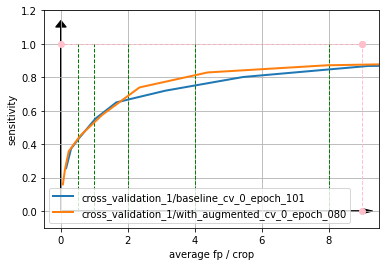

/content/drive/My Drive/DeepSEED-3D-ConvNets-for-Pulmonary-Nodule-Detection/luna_detector/metrics.py:204: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


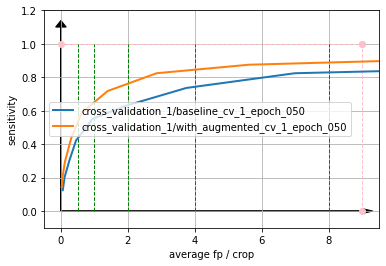

/content/drive/My Drive/DeepSEED-3D-ConvNets-for-Pulmonary-Nodule-Detection/luna_detector/metrics.py:204: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


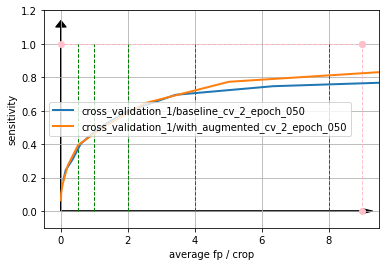

/content/drive/My Drive/DeepSEED-3D-ConvNets-for-Pulmonary-Nodule-Detection/luna_detector/metrics.py:204: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


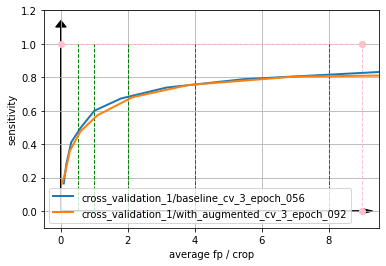

/content/drive/My Drive/DeepSEED-3D-ConvNets-for-Pulmonary-Nodule-Detection/luna_detector/metrics.py:204: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


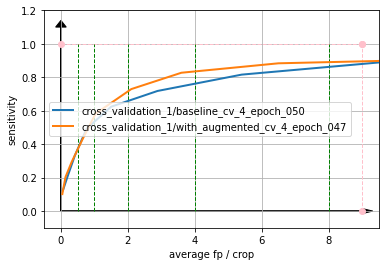

In [6]:
for i in range(5):
  cv.draw(i)

In [7]:
from metrics import add_averages_to_csv

cv.rename_labels()
cv.save_csv('cv_fixed.csv')
add_averages_to_csv('cv_fixed.csv', 'cv_fixed_avg.csv')

In [3]:
cv = CrossValidation('cross_validation_1')
# cv.init_stage(0, 101, 80)
cv.init_stage(1, 50, 50)
cv.init_stage(4, 50, 47)
cv.run_stage(1, 0.8)
cv.eval_stage_metrics(1)
cv.save_stage(1)
cv.run_stage(4, 0.8)
cv.eval_stage_metrics(4)
cv.save_stage(4)

creating model
FOCAL LOSS 2 0.5
FOCAL LOSS 2 0.5
len idcs  82
len(labels)  82
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
da

8it [00:00, 78.12it/s]

evaluating froc results...


750it [00:08, 89.07it/s]
10it [00:00, 90.35it/s]

evaluating froc results...


750it [00:08, 92.56it/s]
10it [00:00, 93.13it/s]

evaluating froc results...


750it [00:07, 93.82it/s]
10it [00:00, 96.45it/s]

evaluating froc results...


750it [00:07, 95.54it/s]
10it [00:00, 97.58it/s]

evaluating froc results...


750it [00:07, 95.94it/s]
10it [00:00, 95.44it/s]

evaluating froc results...


750it [00:07, 96.20it/s]
10it [00:00, 94.88it/s]

evaluating froc results...


750it [00:07, 96.31it/s]
10it [00:00, 96.31it/s]

evaluating froc results...


750it [00:07, 96.72it/s]
10it [00:00, 91.97it/s]

evaluating froc results...


750it [00:07, 97.40it/s]
10it [00:00, 96.98it/s]

evaluating froc results...


750it [00:07, 97.21it/s]
10it [00:00, 90.49it/s]

evaluating froc results...


750it [00:08, 90.04it/s]
10it [00:00, 97.80it/s]

evaluating froc results...


750it [00:08, 92.93it/s]
10it [00:00, 95.23it/s]

evaluating froc results...


750it [00:07, 94.10it/s]
10it [00:00, 93.47it/s]

evaluating froc results...


750it [00:07, 95.16it/s]
10it [00:00, 93.22it/s]

evaluating froc results...


750it [00:07, 95.39it/s]
10it [00:00, 97.09it/s]

evaluating froc results...


750it [00:07, 95.97it/s]
10it [00:00, 98.69it/s]

evaluating froc results...


750it [00:07, 96.27it/s]
10it [00:00, 94.25it/s]

evaluating froc results...


750it [00:07, 96.88it/s]
9it [00:00, 85.89it/s]

evaluating froc results...


750it [00:07, 96.26it/s]
10it [00:00, 92.55it/s]

evaluating froc results...


750it [00:07, 96.61it/s]


creating model
FOCAL LOSS 2 0.5
FOCAL LOSS 2 0.5
len idcs  86
len(labels)  86
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
da

9it [00:00, 85.34it/s]

evaluating froc results...


880it [00:10, 87.57it/s]
10it [00:00, 91.74it/s]

evaluating froc results...


880it [00:09, 90.96it/s]
10it [00:00, 92.37it/s]

evaluating froc results...


880it [00:09, 93.52it/s]
10it [00:00, 99.24it/s]

evaluating froc results...


880it [00:09, 94.77it/s]
10it [00:00, 95.35it/s]

evaluating froc results...


880it [00:09, 94.29it/s]
10it [00:00, 97.95it/s]

evaluating froc results...


880it [00:09, 94.40it/s]
10it [00:00, 92.51it/s]

evaluating froc results...


880it [00:09, 95.29it/s]
10it [00:00, 98.14it/s]

evaluating froc results...


880it [00:09, 96.07it/s]
10it [00:00, 99.76it/s]

evaluating froc results...


880it [00:09, 97.20it/s]
10it [00:00, 97.65it/s]

evaluating froc results...


880it [00:09, 96.47it/s]
10it [00:00, 93.01it/s]

evaluating froc results...


880it [00:09, 89.97it/s]
10it [00:00, 94.61it/s]

evaluating froc results...


880it [00:09, 91.92it/s]
10it [00:00, 94.98it/s]

evaluating froc results...


880it [00:09, 93.53it/s]
10it [00:00, 96.05it/s]

evaluating froc results...


880it [00:09, 95.07it/s]
10it [00:00, 95.88it/s]

evaluating froc results...


880it [00:09, 95.61it/s]
10it [00:00, 91.75it/s]

evaluating froc results...


880it [00:09, 96.29it/s]
10it [00:00, 95.24it/s]

evaluating froc results...


880it [00:09, 96.56it/s]
10it [00:00, 96.39it/s]

evaluating froc results...


880it [00:09, 96.83it/s]
10it [00:00, 98.06it/s]

evaluating froc results...


880it [00:09, 96.35it/s]
9it [00:00, 89.56it/s]

evaluating froc results...


880it [00:09, 96.50it/s]


In [4]:
cv = CrossValidation('cross_validation_1')

cv.init_stage(3, 56, 92)
cv.run_stage(3, 0.8)
cv.eval_stage_metrics(3)
cv.save_stage(3)

cv.init_stage(2, 50, 50)
cv.run_stage(2, 0.8)
cv.eval_stage_metrics(2)
cv.save_stage(2)

creating model
FOCAL LOSS 2 0.5
FOCAL LOSS 2 0.5
len idcs  86
len(labels)  86
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
da

3it [00:00, 25.66it/s]

evaluating froc results...


880it [00:31, 27.67it/s]
3it [00:00, 28.37it/s]

evaluating froc results...


880it [00:31, 28.18it/s]
3it [00:00, 26.83it/s]

evaluating froc results...


880it [00:31, 28.08it/s]
4it [00:00, 31.16it/s]

evaluating froc results...


880it [00:31, 28.06it/s]
3it [00:00, 27.22it/s]

evaluating froc results...


880it [00:31, 28.30it/s]
3it [00:00, 28.79it/s]

evaluating froc results...


880it [00:31, 28.31it/s]
3it [00:00, 27.50it/s]

evaluating froc results...


880it [00:31, 28.07it/s]
3it [00:00, 27.31it/s]

evaluating froc results...


880it [00:31, 27.90it/s]
3it [00:00, 27.33it/s]

evaluating froc results...


880it [00:31, 27.55it/s]
3it [00:00, 26.38it/s]

evaluating froc results...


880it [00:31, 27.64it/s]
3it [00:00, 26.57it/s]

evaluating froc results...


880it [00:32, 27.16it/s]
3it [00:00, 27.37it/s]

evaluating froc results...


880it [00:31, 27.70it/s]
3it [00:00, 27.56it/s]

evaluating froc results...


880it [00:31, 27.80it/s]
4it [00:00, 34.00it/s]

evaluating froc results...


880it [00:31, 27.89it/s]
3it [00:00, 27.19it/s]

evaluating froc results...


880it [00:31, 28.02it/s]
3it [00:00, 28.08it/s]

evaluating froc results...


880it [00:31, 28.15it/s]
3it [00:00, 26.41it/s]

evaluating froc results...


880it [00:30, 28.39it/s]
3it [00:00, 28.26it/s]

evaluating froc results...


880it [00:31, 27.66it/s]
3it [00:00, 26.47it/s]

evaluating froc results...


880it [00:31, 27.75it/s]
3it [00:00, 28.66it/s]

evaluating froc results...


880it [00:31, 28.12it/s]


creating model
FOCAL LOSS 2 0.5
FOCAL LOSS 2 0.5
len idcs  85
len(labels)  85
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
da

9it [00:00, 81.28it/s]

evaluating froc results...


875it [00:09, 87.57it/s]
9it [00:00, 87.97it/s]

evaluating froc results...


875it [00:09, 90.86it/s]
9it [00:00, 86.60it/s]

evaluating froc results...


875it [00:09, 92.44it/s]
9it [00:00, 89.69it/s]

evaluating froc results...


875it [00:09, 93.61it/s]
10it [00:00, 93.27it/s]

evaluating froc results...


875it [00:09, 94.59it/s]
10it [00:00, 95.59it/s]

evaluating froc results...


875it [00:09, 95.24it/s]
10it [00:00, 91.28it/s]

evaluating froc results...


875it [00:09, 95.40it/s]
10it [00:00, 94.37it/s]

evaluating froc results...


875it [00:09, 95.54it/s]
10it [00:00, 93.60it/s]

evaluating froc results...


875it [00:09, 94.85it/s]
10it [00:00, 93.51it/s]

evaluating froc results...


875it [00:09, 94.74it/s]
9it [00:00, 81.27it/s]

evaluating froc results...


875it [00:09, 88.32it/s]
9it [00:00, 88.35it/s]

evaluating froc results...


875it [00:09, 91.01it/s]
9it [00:00, 88.63it/s]

evaluating froc results...


875it [00:09, 93.27it/s]
10it [00:00, 92.13it/s]

evaluating froc results...


875it [00:09, 94.02it/s]
10it [00:00, 92.23it/s]

evaluating froc results...


875it [00:09, 95.10it/s]
10it [00:00, 96.90it/s]

evaluating froc results...


875it [00:09, 95.46it/s]
10it [00:00, 93.57it/s]

evaluating froc results...


875it [00:09, 95.29it/s]
10it [00:00, 97.55it/s]

evaluating froc results...


875it [00:09, 95.82it/s]
10it [00:00, 96.94it/s]

evaluating froc results...


875it [00:09, 95.67it/s]
10it [00:00, 97.18it/s]

evaluating froc results...


875it [00:09, 95.57it/s]


In [6]:
os.makedirs('/content/drive/My Drive/DeepSEED-3D-ConvNets-for-Pulmonary-Nodule-Detection/luna_detector/roc_results_npy/cross_validation_1')

In [7]:
cv.save_stage(0)

/content/drive/My Drive/DeepSEED-3D-ConvNets-for-Pulmonary-Nodule-Detection/luna_detector/metrics.py:204: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


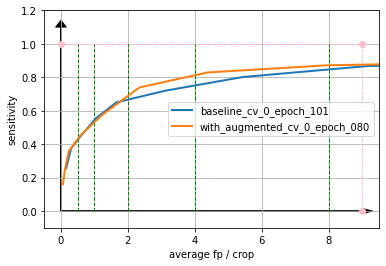

In [8]:
cv.draw(0)

In [ ]:
baseline_2_additional = TestWrapper(False, '2_bad', 86)
baseline_2_additional.run(0.8, 2)
baseline_2_additional.eval_metrics()

creating model
FOCAL LOSS 2 0.5
len idcs  85
len(labels)  85
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.

9it [00:00, 86.17it/s]

evaluating froc results...


875it [00:10, 86.55it/s]
9it [00:00, 84.76it/s]

evaluating froc results...


875it [00:09, 89.15it/s]
10it [00:00, 92.07it/s]

evaluating froc results...


875it [00:09, 91.94it/s]
10it [00:00, 91.99it/s]

evaluating froc results...


875it [00:09, 92.67it/s]
10it [00:00, 93.68it/s]

evaluating froc results...


875it [00:09, 93.44it/s]
10it [00:00, 92.89it/s]

evaluating froc results...


875it [00:09, 94.20it/s]
10it [00:00, 98.05it/s]

evaluating froc results...


875it [00:09, 93.57it/s]
10it [00:00, 94.19it/s]

evaluating froc results...


875it [00:09, 93.56it/s]
10it [00:00, 95.50it/s]

evaluating froc results...


875it [00:09, 94.17it/s]
10it [00:00, 95.57it/s]

evaluating froc results...


875it [00:09, 94.46it/s]


/content/drive/My Drive/DeepSEED-3D-ConvNets-for-Pulmonary-Nodule-Detection/luna_detector/metrics.py:204: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


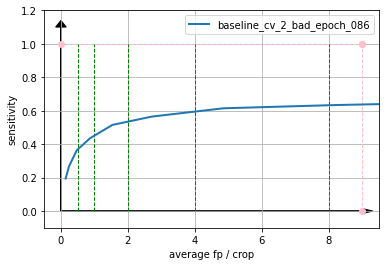

In [ ]:
draw_several([baseline_2_additional.mc])
# baseline_2_additional.save('cross_validation')

In [ ]:
cv = CrossValidation()
cv.init_stage(0, 101, 80)
cv.init_stage(1, 50, 50)
cv.init_stage(2, 50, 50)
cv.init_stage(3, 56, 92)
cv.init_stage(4, 50, 47)

In [ ]:
cv.load_stages()
cv.rename_labels()
# for i in range(5):
#   cv.draw(i)

In [ ]:
cv.save_csv('cv.csv')

In [ ]:
rr

array([[  33,    0,  265,    0,   16],
       [  59,    0,  265,    0,   37],
       [  95,    0,  265,    0,   76],
       [ 135,    0,  265,    0,  159],
       [ 158,    0,  265,    0,  348],
       [ 186,    0,  265,    0,  603],
       [ 211,    0,  265,    0, 1202],
       [ 227,    0,  265,    0, 2153],
       [ 239,    0,  265,    0, 3679],
       [ 247,    0,  265,    0, 6654]])

In [ ]:
from matplotlib import pyplot as plt
from metrics import prepare_canvas, draw_single_roc

def draw_several(mcs, max_x=9.5):
    prepare_canvas(max_x)
    for mc in mcs:
        draw_single_roc(mc.roc_result, label=mc.label)
    plt.legend()
    plt.savefig('cv_plot_5.png')
    plt.show()


/content/drive/My Drive/DeepSEED-3D-ConvNets-for-Pulmonary-Nodule-Detection/luna_detector/metrics.py:204: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


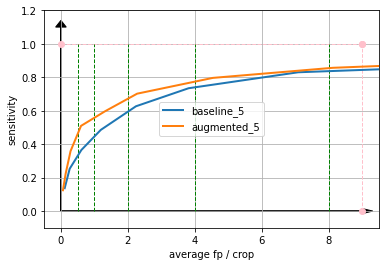

In [ ]:
cv.draw(4)

In [ ]:
cv.add_metrics(2, baseline_2_additional.mc)

In [ ]:
cv.save_csv('cv.csv')

In [ ]:
import pandas as pd

def add_averages_to_csv(filename, output):
  df = pd.read_csv(filename)
  metrics = df.to_numpy()
  def create_average_row(name):
    rows = np.array([row for row in metrics if row[0].startswith(name)])
    return [name] + [np.round(np.mean(values), 3) for values in [rows[:, i + 1] for i in range(7)]]
  average_aug = create_average_row('augmented')
  average_baseline = create_average_row('baseline')
  df.loc[len(metrics)] = average_aug
  df.loc[len(metrics) + 1] = average_baseline
  df.to_csv(output)

In [ ]:
add_averages_to_csv('cv.csv', 'cv1.csv')

In [ ]:
cv.run_stage(3, 0.8)
cv.eval_stage_metrics(3)

creating model
FOCAL LOSS 2 0.5
len idcs  86
len(labels)  86
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.

Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fb264ef9048>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 962, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 942, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process


data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 3

9it [00:00, 89.80it/s]

evaluating froc results...


880it [00:10, 86.91it/s]
10it [00:00, 92.78it/s]

evaluating froc results...


880it [00:09, 91.01it/s]
10it [00:00, 93.30it/s]

evaluating froc results...


880it [00:09, 92.19it/s]
10it [00:00, 97.51it/s]

evaluating froc results...


880it [00:09, 93.40it/s]
10it [00:00, 90.97it/s]

evaluating froc results...


880it [00:09, 93.10it/s]
10it [00:00, 96.12it/s]

evaluating froc results...


880it [00:09, 92.99it/s]
10it [00:00, 97.98it/s]

evaluating froc results...


880it [00:09, 93.76it/s]
9it [00:00, 88.92it/s]

evaluating froc results...


880it [00:09, 93.78it/s]
10it [00:00, 91.58it/s]

evaluating froc results...


880it [00:09, 93.70it/s]
10it [00:00, 92.66it/s]

evaluating froc results...


880it [00:09, 93.89it/s]
9it [00:00, 88.53it/s]

evaluating froc results...


880it [00:10, 87.74it/s]
9it [00:00, 85.81it/s]

evaluating froc results...


880it [00:09, 90.87it/s]
10it [00:00, 92.84it/s]

evaluating froc results...


880it [00:09, 92.71it/s]
10it [00:00, 93.17it/s]

evaluating froc results...


880it [00:09, 92.70it/s]
10it [00:00, 93.12it/s]

evaluating froc results...


880it [00:09, 93.39it/s]
10it [00:00, 94.93it/s]

evaluating froc results...


880it [00:09, 93.99it/s]
10it [00:00, 93.45it/s]

evaluating froc results...


880it [00:09, 93.80it/s]
10it [00:00, 94.81it/s]

evaluating froc results...


880it [00:09, 94.37it/s]
10it [00:00, 96.34it/s]

evaluating froc results...


880it [00:09, 93.14it/s]
10it [00:00, 91.42it/s]

evaluating froc results...


880it [00:09, 93.32it/s]


In [ ]:
cv.save_stage(4)

/content/drive/My Drive/DeepSEED-3D-ConvNets-for-Pulmonary-Nodule-Detection/luna_detector/metrics.py:204: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


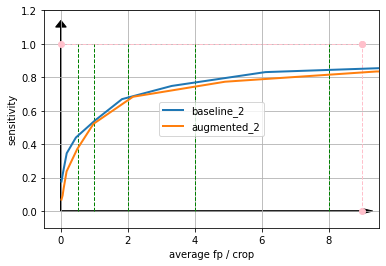

In [ ]:
cv.draw(2)

/content/drive/My Drive/DeepSEED-3D-ConvNets-for-Pulmonary-Nodule-Detection/luna_detector/metrics.py:202: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


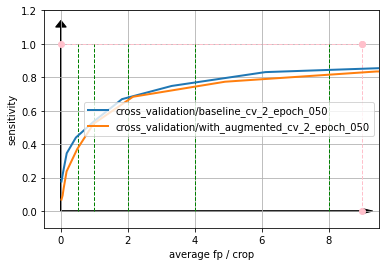

/content/drive/My Drive/DeepSEED-3D-ConvNets-for-Pulmonary-Nodule-Detection/luna_detector/metrics.py:202: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


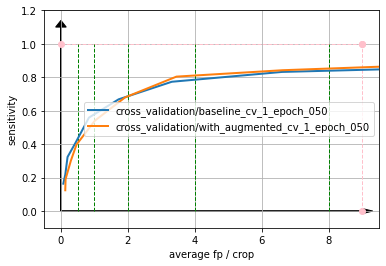

/content/drive/My Drive/DeepSEED-3D-ConvNets-for-Pulmonary-Nodule-Detection/luna_detector/metrics.py:202: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


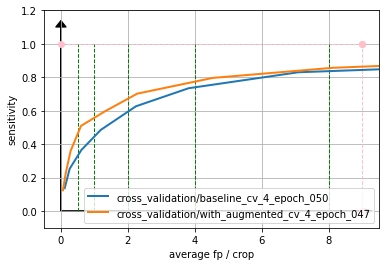

In [ ]:
cv.load_stage(2)
cv.load_stage(1)

cv.load_stage(4)
cv.draw(2)
cv.draw(1)

cv.draw(4)

In [ ]:
cv.run_stage(4, 0.9)

Streaming output truncated to the last 5000 lines.
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 

In [ ]:
cv.eval_stage_metrics(4)
cv.save_stage(4)

10it [00:00, 97.15it/s]

evaluating froc results...


1790it [00:17, 100.05it/s]
11it [00:00, 104.88it/s]

evaluating froc results...


1790it [00:16, 106.17it/s]
11it [00:00, 106.42it/s]

evaluating froc results...


1790it [00:16, 108.29it/s]
12it [00:00, 111.10it/s]

evaluating froc results...


1790it [00:16, 109.44it/s]
11it [00:00, 102.77it/s]

evaluating froc results...


1790it [00:16, 109.63it/s]
12it [00:00, 112.40it/s]

evaluating froc results...


1790it [00:16, 110.90it/s]
11it [00:00, 106.28it/s]

evaluating froc results...


1790it [00:16, 111.30it/s]
12it [00:00, 114.50it/s]

evaluating froc results...


1790it [00:16, 111.56it/s]
12it [00:00, 110.70it/s]

evaluating froc results...


1790it [00:16, 110.11it/s]
12it [00:00, 112.24it/s]

evaluating froc results...


1790it [00:16, 110.78it/s]
11it [00:00, 101.27it/s]

evaluating froc results...


1790it [00:17, 102.31it/s]
11it [00:00, 108.75it/s]

evaluating froc results...


1790it [00:16, 107.05it/s]
10it [00:00, 99.95it/s]

evaluating froc results...


1790it [00:16, 109.95it/s]
11it [00:00, 109.79it/s]

evaluating froc results...


1790it [00:16, 106.47it/s]
11it [00:00, 103.49it/s]

evaluating froc results...


1790it [00:16, 106.36it/s]
11it [00:00, 105.92it/s]

evaluating froc results...


1790it [00:16, 105.95it/s]
11it [00:00, 105.86it/s]

evaluating froc results...


1790it [00:16, 107.52it/s]
11it [00:00, 106.91it/s]

evaluating froc results...


1790it [00:16, 107.69it/s]
12it [00:00, 111.84it/s]

evaluating froc results...


1790it [00:16, 110.24it/s]
11it [00:00, 109.33it/s]

evaluating froc results...


1790it [00:16, 109.30it/s]


/content/drive/My Drive/DeepSEED-3D-ConvNets-for-Pulmonary-Nodule-Detection/luna_detector/metrics.py:202: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


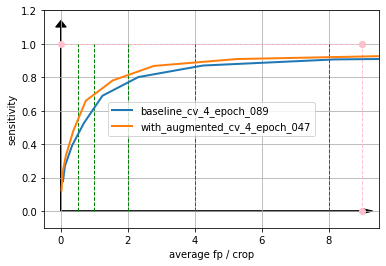

In [ ]:
draw_cv(cv, 4)

In [ ]:
baseline_128_tw = TestWrapper(False, 0, 101)
baseline_128_tw.init(0.90)
baseline_128_tw.run()

creating model
FOCAL LOSS 2 0.5
len idcs  84
len(labels)  84
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.

10it [00:00, 98.16it/s]

evaluating froc results...


1790it [00:16, 106.72it/s]
12it [00:00, 109.81it/s]

evaluating froc results...


1790it [00:16, 109.87it/s]
12it [00:00, 114.36it/s]

evaluating froc results...


1790it [00:16, 111.85it/s]
12it [00:00, 112.75it/s]

evaluating froc results...


1790it [00:15, 113.28it/s]
12it [00:00, 113.20it/s]

evaluating froc results...


1790it [00:15, 113.22it/s]
12it [00:00, 114.82it/s]

evaluating froc results...


1790it [00:15, 115.41it/s]
12it [00:00, 117.36it/s]

evaluating froc results...


1790it [00:15, 115.37it/s]
12it [00:00, 116.11it/s]

evaluating froc results...


1790it [00:15, 115.64it/s]
12it [00:00, 118.11it/s]

evaluating froc results...


1790it [00:15, 115.87it/s]
12it [00:00, 116.80it/s]

evaluating froc results...


1790it [00:15, 115.39it/s]


In [ ]:
with_augmented_tw = TestWrapper('with_augmented_128_4_032')
with_augmented_tw.init()
with_augmented_tw.run()
# with_augmented_tw.load(None)

creating model
FOCAL LOSS 2 0.5
len idcs  83
len(labels)  83
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.Size([1, 1, 128, 128, 128])
coord shape:  torch.Size([1, 3, 32, 32, 32])
data shape:  torch.

10it [00:00, 92.29it/s]

evaluating froc results...


350it [00:04, 86.88it/s]
10it [00:00, 91.76it/s]

evaluating froc results...


350it [00:03, 91.48it/s]
11it [00:00, 97.46it/s]

evaluating froc results...


350it [00:03, 94.23it/s]
11it [00:00, 100.25it/s]

evaluating froc results...


350it [00:03, 96.32it/s]
10it [00:00, 97.25it/s]

evaluating froc results...


350it [00:03, 96.27it/s]
10it [00:00, 96.99it/s]

evaluating froc results...


350it [00:03, 97.61it/s]
11it [00:00, 101.11it/s]

evaluating froc results...


350it [00:03, 98.51it/s]
11it [00:00, 98.51it/s]

evaluating froc results...


350it [00:03, 98.09it/s]
11it [00:00, 99.97it/s]

evaluating froc results...


350it [00:03, 99.44it/s]
10it [00:00, 99.81it/s]

evaluating froc results...


350it [00:03, 100.03it/s]


### Run baseline eval and init baseline mc

In [ ]:
baseline_mc_072 = FROCMetricsCalculator()
baseline_mc_072.load('baseline_072.npy')
# baseline_072_mc = FROCMetricsCalculator(baseline_result, label='baseline_072')
# baseline_072_mc.save()

In [ ]:
baseline72_test = SimpleTest(path_to_model='baseline_5/detector_072.ckpt', r_rand=0.95)
baseline72_result = run_test(baseline72_test, mode='froc', left=-1, thr_number=40)

baseline_072_mc = FROCMetricsCalculator(baseline72_result, label='baseline_72')
# baseline_052_mc.load('froc_baseline_1.npy')
baseline_072_mc.save()

creating model
FOCAL LOSS 2 0.5
len idcs  84
len(labels)  84


46it [00:00, 455.85it/s]

evaluating froc results...


3579it [00:05, 627.11it/s]
52it [00:00, 508.78it/s]

evaluating froc results...


3579it [00:05, 650.61it/s]
53it [00:00, 529.55it/s]

evaluating froc results...


3579it [00:05, 668.64it/s]
54it [00:00, 532.33it/s]

evaluating froc results...


3579it [00:05, 692.98it/s]
55it [00:00, 545.49it/s]

evaluating froc results...


3579it [00:05, 708.22it/s]
61it [00:00, 605.52it/s]

evaluating froc results...


3579it [00:04, 725.54it/s]
60it [00:00, 598.46it/s]

evaluating froc results...


3579it [00:04, 733.14it/s]
62it [00:00, 606.76it/s]

evaluating froc results...


3579it [00:04, 750.32it/s]
61it [00:00, 608.65it/s]

evaluating froc results...


3579it [00:04, 778.86it/s]
67it [00:00, 656.90it/s]

evaluating froc results...


3579it [00:04, 788.98it/s]
70it [00:00, 691.38it/s]

evaluating froc results...


3579it [00:04, 809.73it/s]
73it [00:00, 724.51it/s]

evaluating froc results...


3579it [00:04, 821.04it/s]
66it [00:00, 659.96it/s]

evaluating froc results...


3579it [00:04, 834.13it/s]
77it [00:00, 766.53it/s]

evaluating froc results...


3579it [00:04, 849.22it/s]
78it [00:00, 776.04it/s]

evaluating froc results...


3579it [00:04, 858.29it/s]
79it [00:00, 789.71it/s]

evaluating froc results...


3579it [00:04, 867.48it/s]
83it [00:00, 828.83it/s]

evaluating froc results...


3579it [00:04, 882.90it/s]
84it [00:00, 819.66it/s]

evaluating froc results...


3579it [00:04, 890.91it/s]
83it [00:00, 823.21it/s]

evaluating froc results...


3579it [00:03, 899.75it/s]
84it [00:00, 839.45it/s]

evaluating froc results...


3579it [00:03, 906.17it/s]
87it [00:00, 862.42it/s]

evaluating froc results...


3579it [00:03, 921.46it/s]
74it [00:00, 737.80it/s]

evaluating froc results...


3579it [00:03, 929.70it/s]
83it [00:00, 821.74it/s]

evaluating froc results...


3579it [00:03, 941.44it/s]
91it [00:00, 908.66it/s]

evaluating froc results...


3579it [00:03, 948.95it/s]
91it [00:00, 906.10it/s]

evaluating froc results...


3579it [00:03, 953.01it/s]
90it [00:00, 897.64it/s]

evaluating froc results...


3579it [00:03, 950.97it/s]
95it [00:00, 943.35it/s]

evaluating froc results...


3579it [00:03, 958.96it/s]
92it [00:00, 917.59it/s]

evaluating froc results...


3579it [00:03, 970.41it/s]
100it [00:00, 995.95it/s]

evaluating froc results...


3579it [00:03, 984.14it/s] 
99it [00:00, 983.94it/s]

evaluating froc results...


3579it [00:03, 990.44it/s]
102it [00:00, 1014.87it/s]

evaluating froc results...


3579it [00:03, 997.97it/s] 
101it [00:00, 1003.22it/s]

evaluating froc results...


3579it [00:03, 994.31it/s]
103it [00:00, 1025.83it/s]

evaluating froc results...


3579it [00:03, 997.48it/s] 
97it [00:00, 964.55it/s]

evaluating froc results...


3579it [00:03, 1007.29it/s]
103it [00:00, 1028.58it/s]

evaluating froc results...


3579it [00:03, 1003.71it/s]
101it [00:00, 999.94it/s]

evaluating froc results...


3579it [00:03, 996.45it/s]
98it [00:00, 976.05it/s]

evaluating froc results...


3579it [00:03, 1016.36it/s]
105it [00:00, 1031.99it/s]

evaluating froc results...


3579it [00:03, 1023.49it/s]
98it [00:00, 975.08it/s]

evaluating froc results...


3579it [00:03, 1025.67it/s]
99it [00:00, 983.89it/s]

evaluating froc results...


3579it [00:03, 1028.69it/s]


In [ ]:
baseline102_test = SimpleTest(path_to_model='baseline_5/detector_102.ckpt', r_rand=0.95)
baseline102_result = run_test(baseline102_test, mode='froc', left=-1, thr_number=40)

baseline_102_mc = FROCMetricsCalculator(baseline102_result, label='baseline_102')
# baseline_052_mc.load('froc_baseline_1.npy')
baseline_102_mc.save()

creating model
FOCAL LOSS 2 0.5
len idcs  84
len(labels)  84


64it [00:00, 634.11it/s]

evaluating froc results...


3579it [00:05, 653.82it/s]
64it [00:00, 627.95it/s]

evaluating froc results...


3579it [00:05, 677.22it/s]
65it [00:00, 649.77it/s]

evaluating froc results...


3579it [00:05, 696.21it/s]
70it [00:00, 683.31it/s]

evaluating froc results...


3579it [00:05, 711.45it/s]
70it [00:00, 695.89it/s]

evaluating froc results...


3579it [00:04, 729.68it/s]
68it [00:00, 675.27it/s]

evaluating froc results...


3579it [00:04, 749.67it/s]
73it [00:00, 728.85it/s]

evaluating froc results...


3579it [00:04, 752.80it/s]
74it [00:00, 739.22it/s]

evaluating froc results...


3579it [00:04, 772.79it/s]
74it [00:00, 734.19it/s]

evaluating froc results...


3579it [00:04, 791.76it/s]
77it [00:00, 765.67it/s]

evaluating froc results...


3579it [00:04, 808.89it/s]
77it [00:00, 769.54it/s]

evaluating froc results...


3579it [00:04, 829.28it/s]
81it [00:00, 809.85it/s]

evaluating froc results...


3579it [00:04, 835.61it/s]
75it [00:00, 740.33it/s]

evaluating froc results...


3579it [00:04, 850.49it/s]
86it [00:00, 858.16it/s]

evaluating froc results...


3579it [00:04, 866.67it/s]
84it [00:00, 839.50it/s]

evaluating froc results...


3579it [00:04, 878.34it/s]
86it [00:00, 859.19it/s]

evaluating froc results...


3579it [00:04, 887.88it/s]
89it [00:00, 882.11it/s]

evaluating froc results...


3579it [00:03, 900.03it/s]
79it [00:00, 785.83it/s]

evaluating froc results...


3579it [00:03, 912.38it/s]
89it [00:00, 890.00it/s]

evaluating froc results...


3579it [00:03, 919.32it/s]
92it [00:00, 917.94it/s]

evaluating froc results...


3579it [00:03, 927.73it/s]
92it [00:00, 911.43it/s]

evaluating froc results...


3579it [00:03, 937.21it/s]
91it [00:00, 898.74it/s]

evaluating froc results...


3579it [00:03, 943.40it/s]
94it [00:00, 939.11it/s]

evaluating froc results...


3579it [00:03, 951.83it/s]
96it [00:00, 947.52it/s]

evaluating froc results...


3579it [00:03, 962.64it/s]
94it [00:00, 929.72it/s]

evaluating froc results...


3579it [00:03, 967.98it/s]
95it [00:00, 946.86it/s]

evaluating froc results...


3579it [00:03, 975.63it/s]
91it [00:00, 902.62it/s]

evaluating froc results...


3579it [00:03, 968.83it/s]
90it [00:00, 889.51it/s]

evaluating froc results...


3579it [00:03, 974.88it/s]
95it [00:00, 947.49it/s]

evaluating froc results...


3579it [00:03, 980.08it/s]
100it [00:00, 992.73it/s]

evaluating froc results...


3579it [00:03, 997.93it/s]
98it [00:00, 979.35it/s]

evaluating froc results...


3579it [00:03, 1003.71it/s]
100it [00:00, 998.01it/s]

evaluating froc results...


3579it [00:03, 1017.75it/s]
102it [00:00, 1013.08it/s]

evaluating froc results...


3579it [00:03, 1012.04it/s]
95it [00:00, 943.80it/s]

evaluating froc results...


3579it [00:03, 1011.69it/s]
104it [00:00, 1031.98it/s]

evaluating froc results...


3579it [00:03, 1018.15it/s]
101it [00:00, 1007.60it/s]

evaluating froc results...


3579it [00:03, 1024.08it/s]
102it [00:00, 1015.04it/s]

evaluating froc results...


3579it [00:03, 1029.53it/s]
105it [00:00, 1041.83it/s]

evaluating froc results...


3579it [00:03, 1019.16it/s]
104it [00:00, 1036.27it/s]

evaluating froc results...


3579it [00:03, 1035.88it/s]
106it [00:00, 1048.95it/s]

evaluating froc results...


3579it [00:03, 1038.30it/s]


## Analyzing patient data loader

In [ ]:
def print_mean_and_std(x):
  print('x mean ', np.mean(x))
  print('x std ', np.std(x))

In [ ]:
os.chdir(luna_path)
from patient_data_loader import PatientDataLoader, Cropper
from res18_se import config
from config_training import config as config_training

data_path = opjoin('/content/drive/My Drive/DeepSEED-3D-ConvNets-for-Pulmonary-Nodule-Detection', config_training['preprocess_result_path'])
luna_test = np.load('./luna_test.npy')
pdl = PatientDataLoader(data_path, luna_test, config, 0, 0)

len idcs  84
len(labels)  84


In [ ]:
pdl_crops, _, _ = pdl[5]